<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Animated Activity and Predominance Diagrams Part 1</h1><br />
</tr>
</table>
</left>

In [1]:
from pychnosz import *
_ = thermo("WORM")

reset: thermodynamic system initialized
The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species


### Interactive activity plot

In the example below, we will create an interactive activity diagram of aqueous carbonate species.

Define `basis`, `species`, `affinity`, and `diagram` to make an interactive plot (`interactive=True`).

info_character: found CO2(aq); also available in gas
info_character: found O2(aq); also available in gas
info_character: found H2O(liq) [water]; also available in gas
info_character: found CO2(aq); also available in gas
affinity: temperature is 150 ºC
affinity: pressure is Psat
subcrt: 6 species at 150 ºC and Psat (wet) [energy units: J]


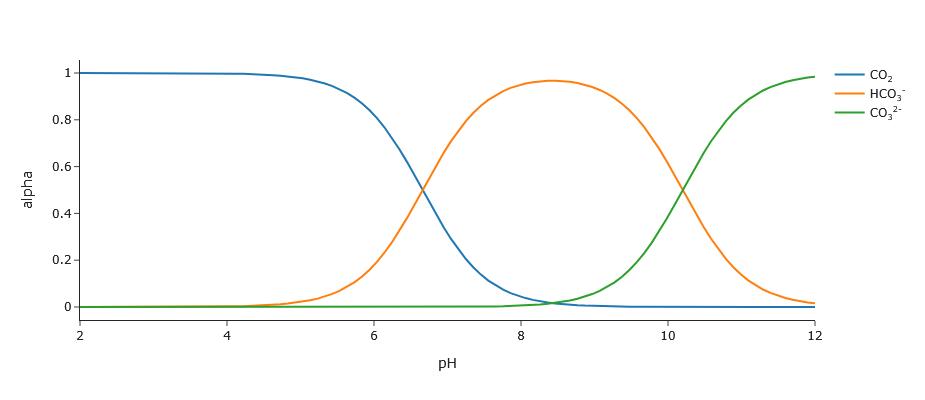

In [2]:
basis(species=["CO2", "O2", "H2O", "H+"])
species(species=["CO2", "HCO3-", "CO3-2"])

a = affinity(pH=[2, 12, 100], T=150)
_ = diagram(a, alpha=True, width=500, height=400, interactive=True)

### Animated interactive activity plot

Similar to what was done above, define `basis`, `species`, `affinity`, and `diagram` function arguments (args), then feed them into the `animation` function.

Define the variable used to animate (`anim_var`), its range, and number of animation frames. In this case, temperature `T` will be our animating variable. The animation will begin at 0 °C, end at 350 °C, and will have 15 frames.

info_character: found CO2(aq); also available in gas


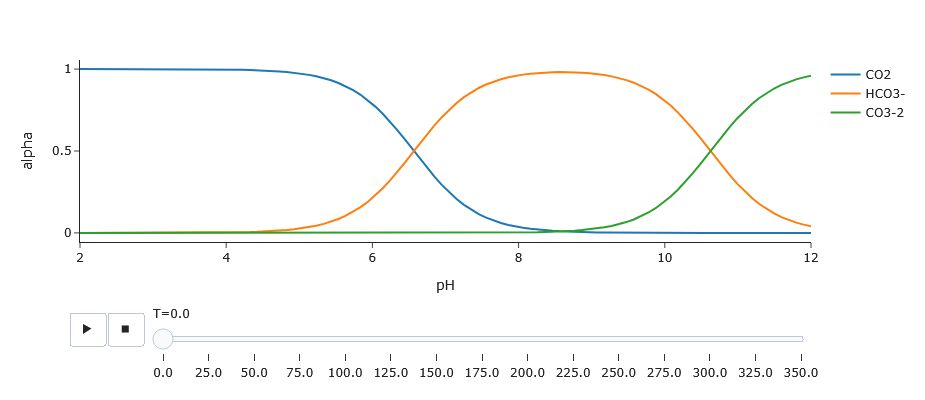

In [3]:
basis_args = {"species": ["CO2", "O2", "H2O", "H+"]}
species_args = {"species": ["CO2", "HCO3-", "CO3-2"]}

affinity_args = {"pH":[2, 12, 100]}
diagram_args = {"alpha":True, "width":500, "height":400}

animation(
    basis_args=basis_args,
    species_args=species_args,
    affinity_args=affinity_args,
    diagram_args=diagram_args,
    anim_var='T',
    anim_range=[0, 350, 15],
    messages=False,
)

### Interactive predominance diagram

The example below shows how to create an interactive predominance diagram of minerals in the K$_2$O-Al$_2$O$_3$-SiO$_2$-H$_2$O system.

A predominance diagram is made the same way as an activity diagram, but we supply two variable ranges for `affinity` instead of one. In the example below, the two variable ranges are for H$_4$SiO$_4$ (log activity of -8 to 0) and K$^+$ (log activity of -1 to 8). Each axis will have a resolution of 300 calculations.

info_character: found SiO2(aq); also available in cr
info_character: found H2O(liq) [water]; also available in gas
info_character: found O2(aq); also available in gas
affinity: temperature is 25 ºC
affinity: pressure is Psat
affinity: variable 1 is log10(a_SiO2) at 300 values from -8 to 0
affinity: variable 2 is log10(a_K+) at 300 values from -1 to 8
subcrt: 11 species at 25 ºC and Psat (wet) [energy units: J]


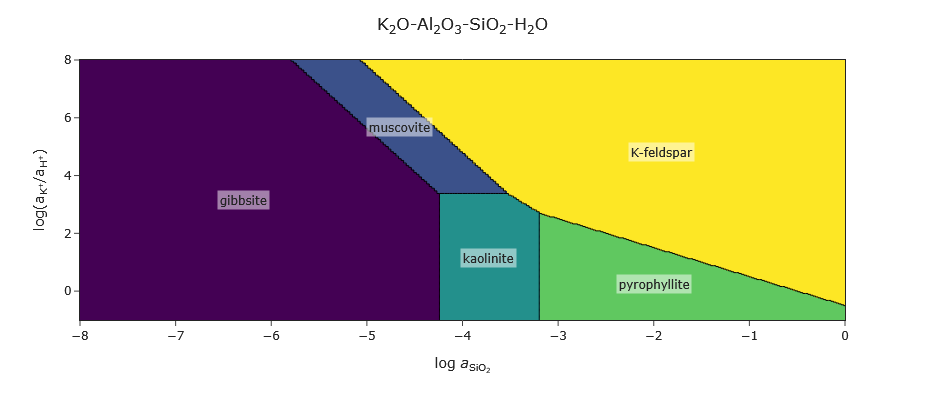

In [4]:
basis(["Al+3", "SiO2", "K+", "H2O", "H+", "O2"])
species(["gibbsite", "muscovite", "kaolinite", "pyrophyllite", "K-feldspar"])

a = affinity(**{"SiO2":[-8, 0, 300], "K+":[-1, 8, 300]})
_ = diagram(a, width=500, height=400, interactive=True, ylab=ratlab_html("K+"),
            main=syslab_html(["K2O", "Al2O3", "SiO2", "H2O"]))

### Animated interactive predominance diagram

Like the previous animated interactive diagram, we specify `basis`, `species`, `affinity`, and `diagram`, then feed them into the `animation` function. Temperature will be the animating variable (0 to 350 °C over 8 frames).

We will lower the resolution from 300 to 100 calculations along each axis. The animated plot will look blockier but will generate faster and result in a faster-loading notebook with a smaller filesize.

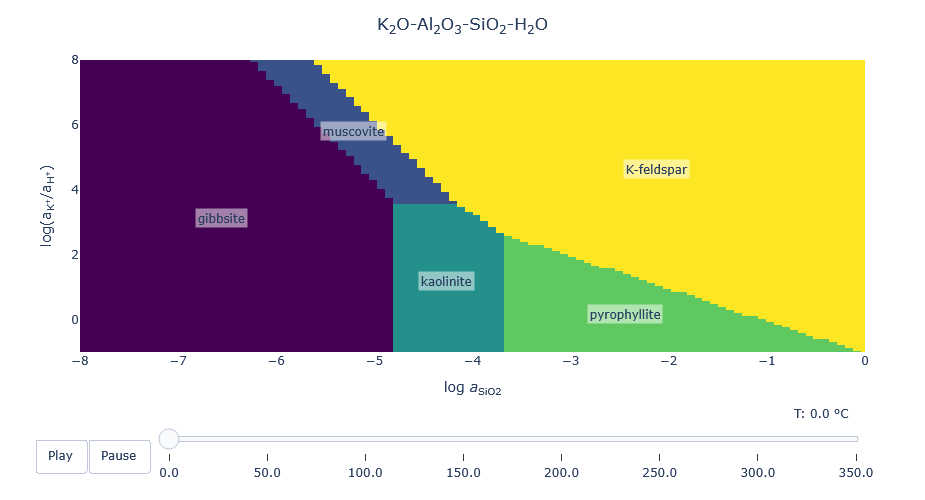

In [5]:
basis_args = {"species": ["Al+3", "SiO2", "K+", "H2O", "H+", "O2"]}
species_args = {"species": ["gibbsite", "muscovite", "kaolinite", "pyrophyllite", "K-feldspar"]}

affinity_args = {"SiO2":[-8, 0, 100], "K+":[-1, 8, 100]}
diagram_args = {"alpha":True, "width":500, "height":400, "ylab":ratlab_html("K+"),
                "main":syslab_html(["K2O", "Al2O3", "SiO2", "H2O"])}

animation(
    basis_args=basis_args,
    species_args=species_args,
    affinity_args=affinity_args,
    diagram_args=diagram_args,
    anim_var='T',
    anim_range=[0, 350, 8],
    messages=False,
)

End of demo.